In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("covid19_tweets.csv")
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [28]:
data['user_verified'] = data['user_verified'].astype(int)
data['is_retweet'] = data['is_retweet'].astype(int)

### Análisis de Distribuciones

In [21]:
def histogram_boxplot(data, feature):
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw = {"height_ratios": (.25, .75)}, 
        figsize=(15,10)
    )
    
    fig.suptitle(f'Distribution for {feature}', y=.94)
        
    
    sns.boxplot(
        x=feature,
        data=data,
        ax=ax_box,
        showmeans=True,
        color='violet'
    )
    sns.histplot(
        x=feature,
        data=data,
        ax=ax_hist,
        kde=True,
        bins=30
    )

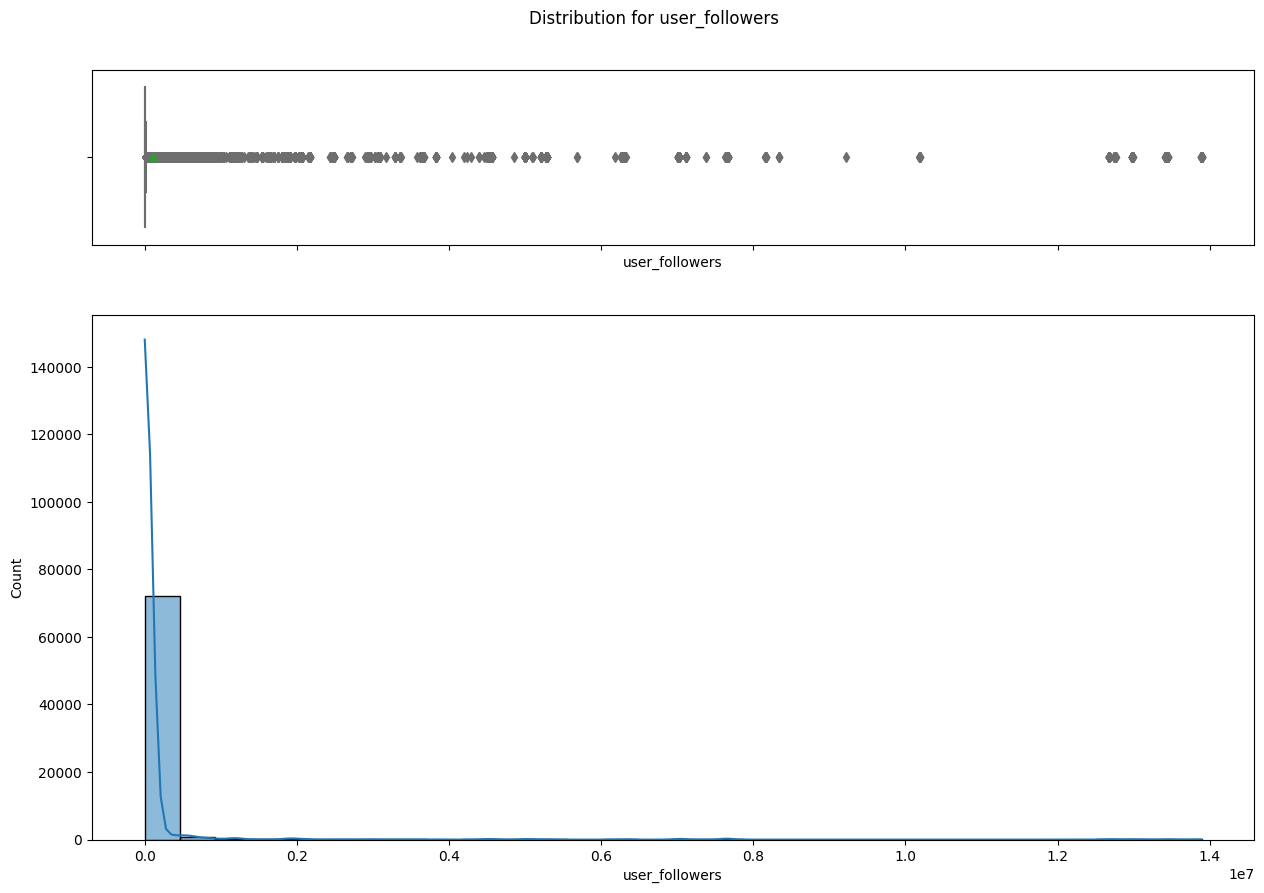

In [22]:
histogram_boxplot(data=data, feature="user_followers")

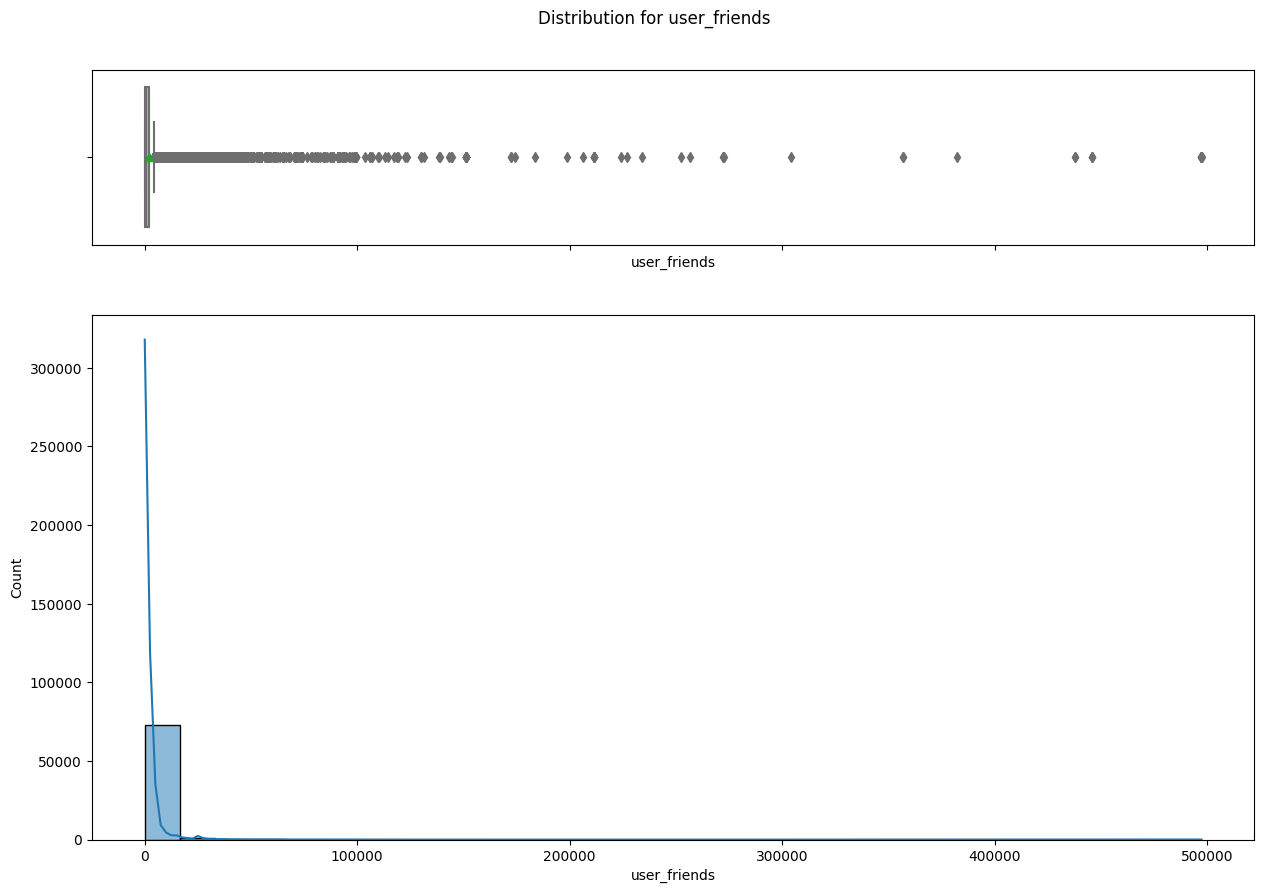

In [24]:
histogram_boxplot(data=data, feature="user_friends")

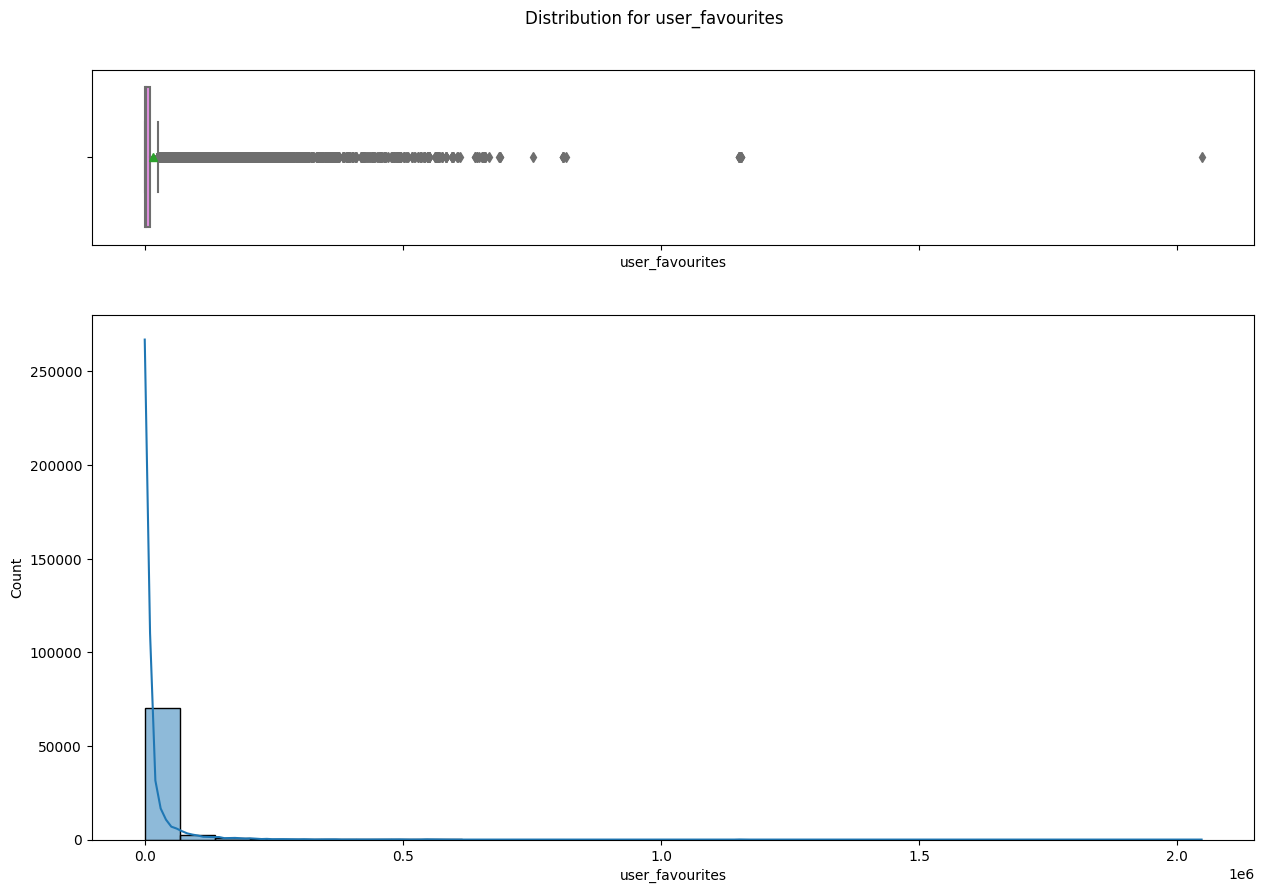

In [25]:
histogram_boxplot(data=data, feature="user_favourites")

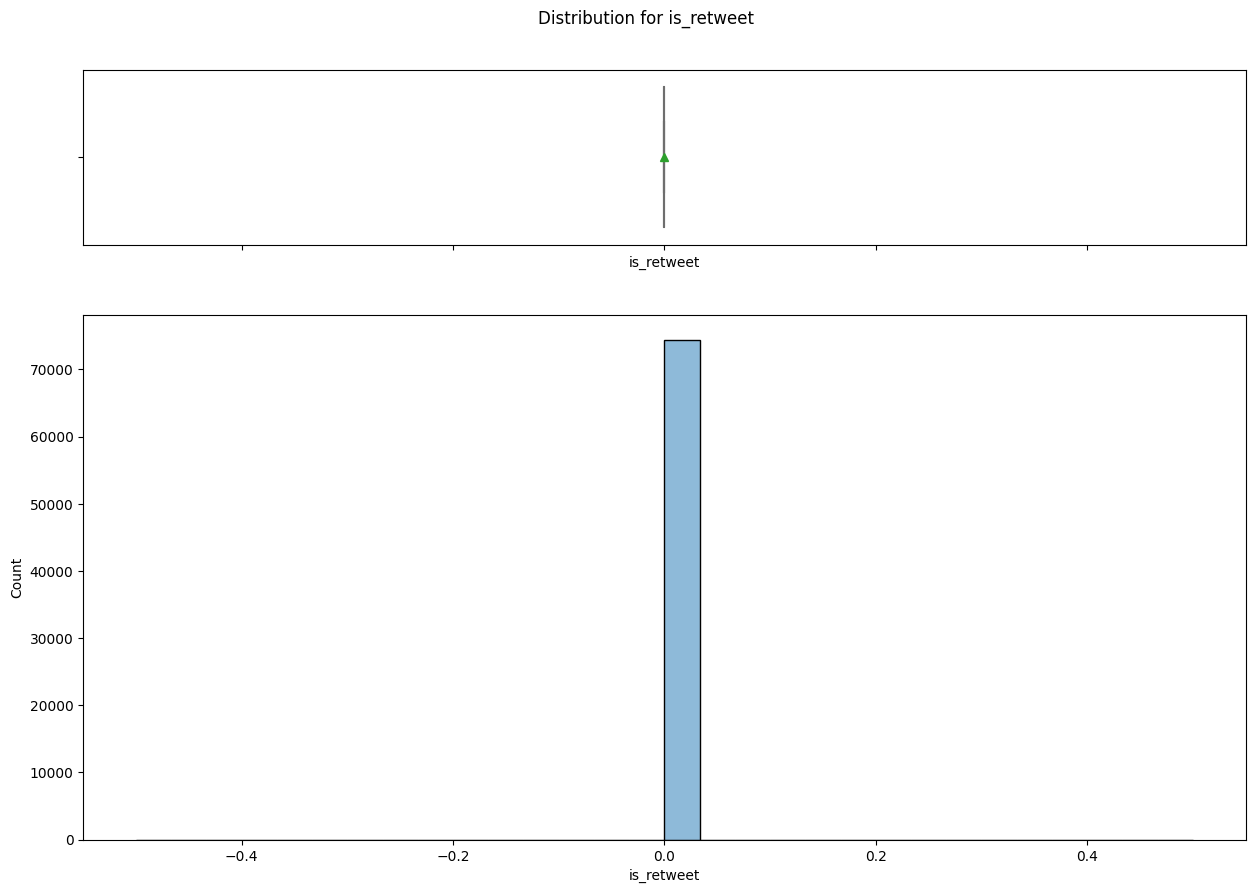

In [30]:
histogram_boxplot(data=data, feature="is_retweet")

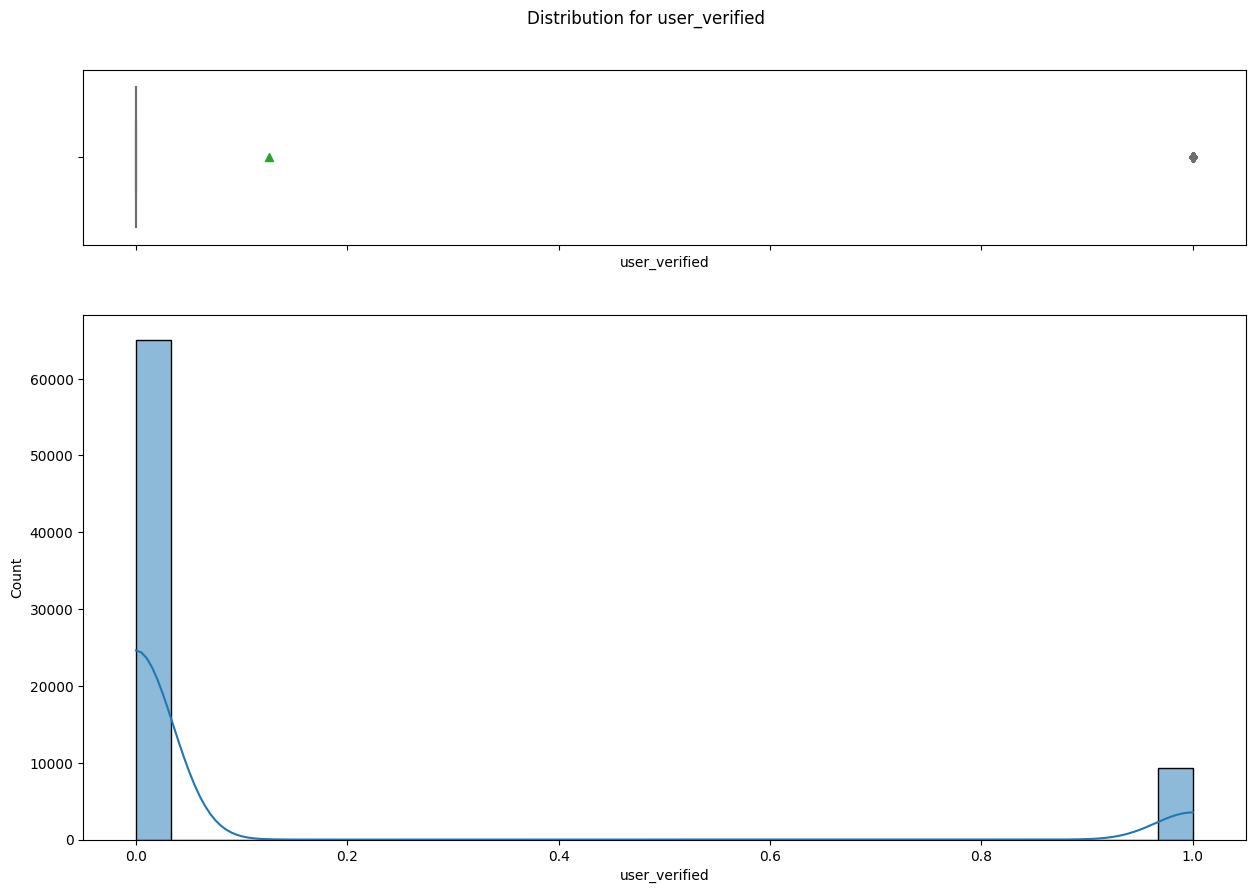

In [31]:
histogram_boxplot(data=data, feature="user_verified")

### Correlación

<AxesSubplot: >

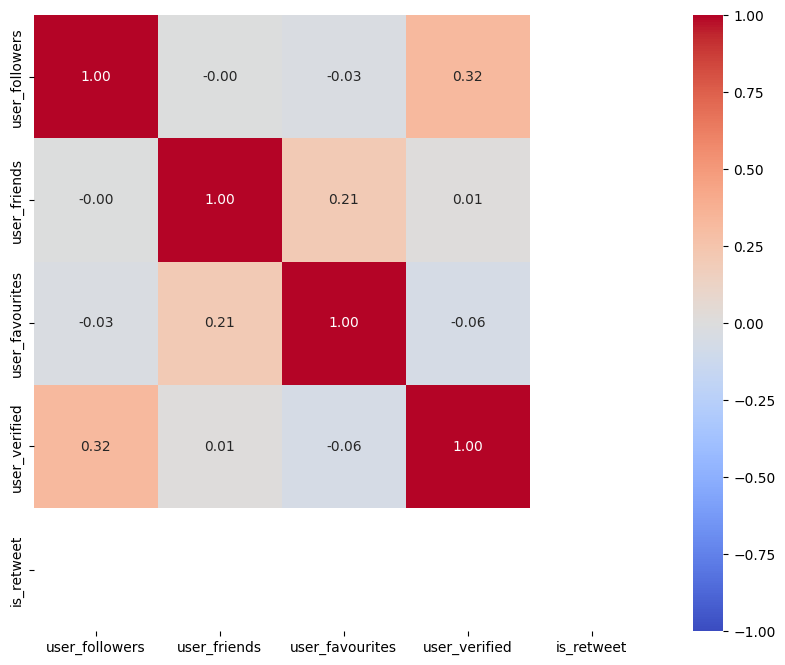

In [29]:
num_cols = data.select_dtypes('number').columns.to_list()
corr = data[num_cols].corr()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, fmt='.2f', annot=True)

#### ¿Hay alguna variable que no aporta información?

Sí, la variable is_retweet no está aportando información, pues todos sus valores son iguales a False

#### Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

Quitaría la variable is_retweet porque no se correlaciona con el resto. El resto las mantento, porque sí hay correlación entre ellas y cada una puede aportar información valiosa

#### ¿Existen variables que tengan datos extraños?

Sí, las variables user_friends, user_followers y user_favourites tienen outliers todas. Esto significa que hay, por ejemplo, una pequeña cantidad de usuarios con muchos followers, que podrían considerarse como influencers

#### ¿Las variables están en rangos similares? ¿Esto afecta?

No, las variables están en diferentes rangos. Por ejemplo, user_friends está entre 0 y 500,000; por otra parte, user_followers está entre 0 y 10,000,000. Esto puede afectar a los modelos: dado que kmeans se basa en calcular distancias euclidianas, es probable que esta diferencia en rangos pueda separar en más clusters de los necesarios. Haría falta normalizar los datos

#### ¿Puedes encontrar grupos que se parezcan?

Sí, a partir del análisis de k means en la actividad anterior, y considerando las distribuciones de las variables exploradaen esta actividad, podemos ver que hay grupos de personas con pocos amigos y pocos seguidores, y hay otro grupo de personas con pocos amigos y una enorme cantidad de seguidores. Estos grupos están bastante diferenciados como para poder ser identificados por algoritmos de clustering.